# 1. Data Cleaning

In [1]:
import pandas as pd

# Load your CSVs
payment_products = pd.read_csv("payment_products.csv")
payment_history = pd.read_csv("payment_history.csv")
subscription_status = pd.read_csv("app_user_subscription_status.csv")
user_subscription = pd.read_csv("app_user_subscription.csv")
app_users = pd.read_csv("app_users.csv")

# Function to drop columns with more than 50% nulls
def drop_high_null_columns(df, threshold=0.5):
    return df.dropna(axis=1, thresh=int((1 - threshold) * len(df)))

# Apply cleaning
payment_products_cleaned = drop_high_null_columns(payment_products)
payment_history_cleaned = drop_high_null_columns(payment_history)
subscription_status_cleaned = drop_high_null_columns(subscription_status)
user_subscription_cleaned = drop_high_null_columns(user_subscription)
app_users_cleaned = drop_high_null_columns(app_users)

# Print remaining columns for each dataset
print("payment_products columns:", payment_products_cleaned.columns.tolist())
print("payment_history columns:", payment_history_cleaned.columns.tolist())
print("subscription_status columns:", subscription_status_cleaned.columns.tolist())
print("user_subscription columns:", user_subscription_cleaned.columns.tolist())
print("app_users columns:", app_users_cleaned.columns.tolist())


/tmp/ipykernel_2126/3850099169.py:5: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  payment_history = pd.read_csv("payment_history.csv")


payment_products columns: ['id', 'gameobjecthash', 'name', 'image', 'method', 'category', 'discount', 'price', 'featured', 'popular', 'published_at', 'expires_at', 'created_at', 'updated_at']
payment_history columns: ['idpayment', 'producthash', 'type', 'status', 'category', 'method', 'amount', 'rewards', 'iduser', 'hide_acquire', 'buying_option', 'description', 'confirmed', 'redeemed', 'created_at', 'updated_at']
subscription_status columns: ['id', 'date', 'trial_total', 'unconverted_total', 'subscriber_total', 'subscriber_member', 'subscriber_pro', 'subscriber_lifetime', 'expired_total', 'converted_to_member', 'converted_to_pro', 'converted_to_lifetime', 'lost_conversion', 'resurrected', 'lost', 'expired_from_member', 'expired_from_pro', 'updated_at', 'created_at']
user_subscription columns: ['id', 'iduser', 'tier_name', 'interval_name', 'product_price', 'status', 'product_id', 'provider', 'started_at_utc', 'expires_at_utc', 'next_reward_at_utc', 'next_reminder_at_utc', 'created_at',

In [2]:
# Delete the first row of app_user_subscription_status (Data transformation point)
subscription_status_cleaned = subscription_status_cleaned.iloc[1:].reset_index(drop=True)

# Show first few rows to confirm
print(subscription_status_cleaned.head())

   id                 date  trial_total  unconverted_total  subscriber_total  \
0   2  2024-08-15 18:00:41          544              66063              3820   
1   3  2024-08-16 18:00:49          548              66063              3821   
2   4  2024-08-17 18:00:57          556              66061              3825   
3   5  2024-08-18 18:00:54          570              66057              3830   
4   6  2024-08-19 18:00:34          577              66052              3836   

   subscriber_member  subscriber_pro  subscriber_lifetime  expired_total  \
0                 57            3734                   29            545   
1                 58            3733                   30            545   
2                 67            3728                   30            544   
3                 72            3728                   30            544   
4                 78            3728                   30            543   

   converted_to_member  converted_to_pro  converted_to_lifetim

# 2. EDA (Exploratory Data Analysis)

## 2.1 App_Users

In [3]:
# Convert object columns to datetime if possible
for col in app_users_cleaned.select_dtypes(include='object'):
    try:
        app_users_cleaned[col] = pd.to_datetime(app_users_cleaned[col])
    except Exception:
        pass  # Keep non-date object columns unchanged
        
# Perform EDA
print("\n--- EDA: app_users_cleaned ---")
print("Shape:", app_users_cleaned.shape)

# Show columns with missing values
missing = app_users_cleaned.isnull().sum()
print("\nMissing Values:\n", missing[missing > 0])

# Show data types
print("\nData Types:\n", app_users_cleaned.dtypes)

# Show summary statistics
print("\nSummary Statistics:\n", app_users_cleaned.describe(include='all'))


--- EDA: app_users_cleaned ---
Shape: (78890, 5)

Missing Values:
 Series([], dtype: int64)

Data Types:
 id                              int64
idhero                          int64
username                       object
created_at             datetime64[ns]
subscription_status            object
dtype: object

Summary Statistics:
                   id        idhero   username                     created_at  \
count   78890.000000  78890.000000      78890                          78890   
unique           NaN           NaN      78504                            NaN   
top              NaN           NaN  llllllll-                            NaN   
freq             NaN           NaN          5                            NaN   
mean    41414.796083  42316.760591        NaN  2021-07-10 10:47:52.483851008   
min         1.000000      1.000000        NaN            2016-05-16 09:13:53   
25%     20493.500000  21760.500000        NaN            2018-12-10 12:54:52   
50%     41146.500000  42417

/tmp/ipykernel_2126/1413992301.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  app_users_cleaned[col] = pd.to_datetime(app_users_cleaned[col])
/tmp/ipykernel_2126/1413992301.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_users_cleaned[col] = pd.to_datetime(app_users_cleaned[col])
/tmp/ipykernel_2126/1413992301.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  app_users_cleaned[col] = pd.to_datetime(app_users_cleaned[col])


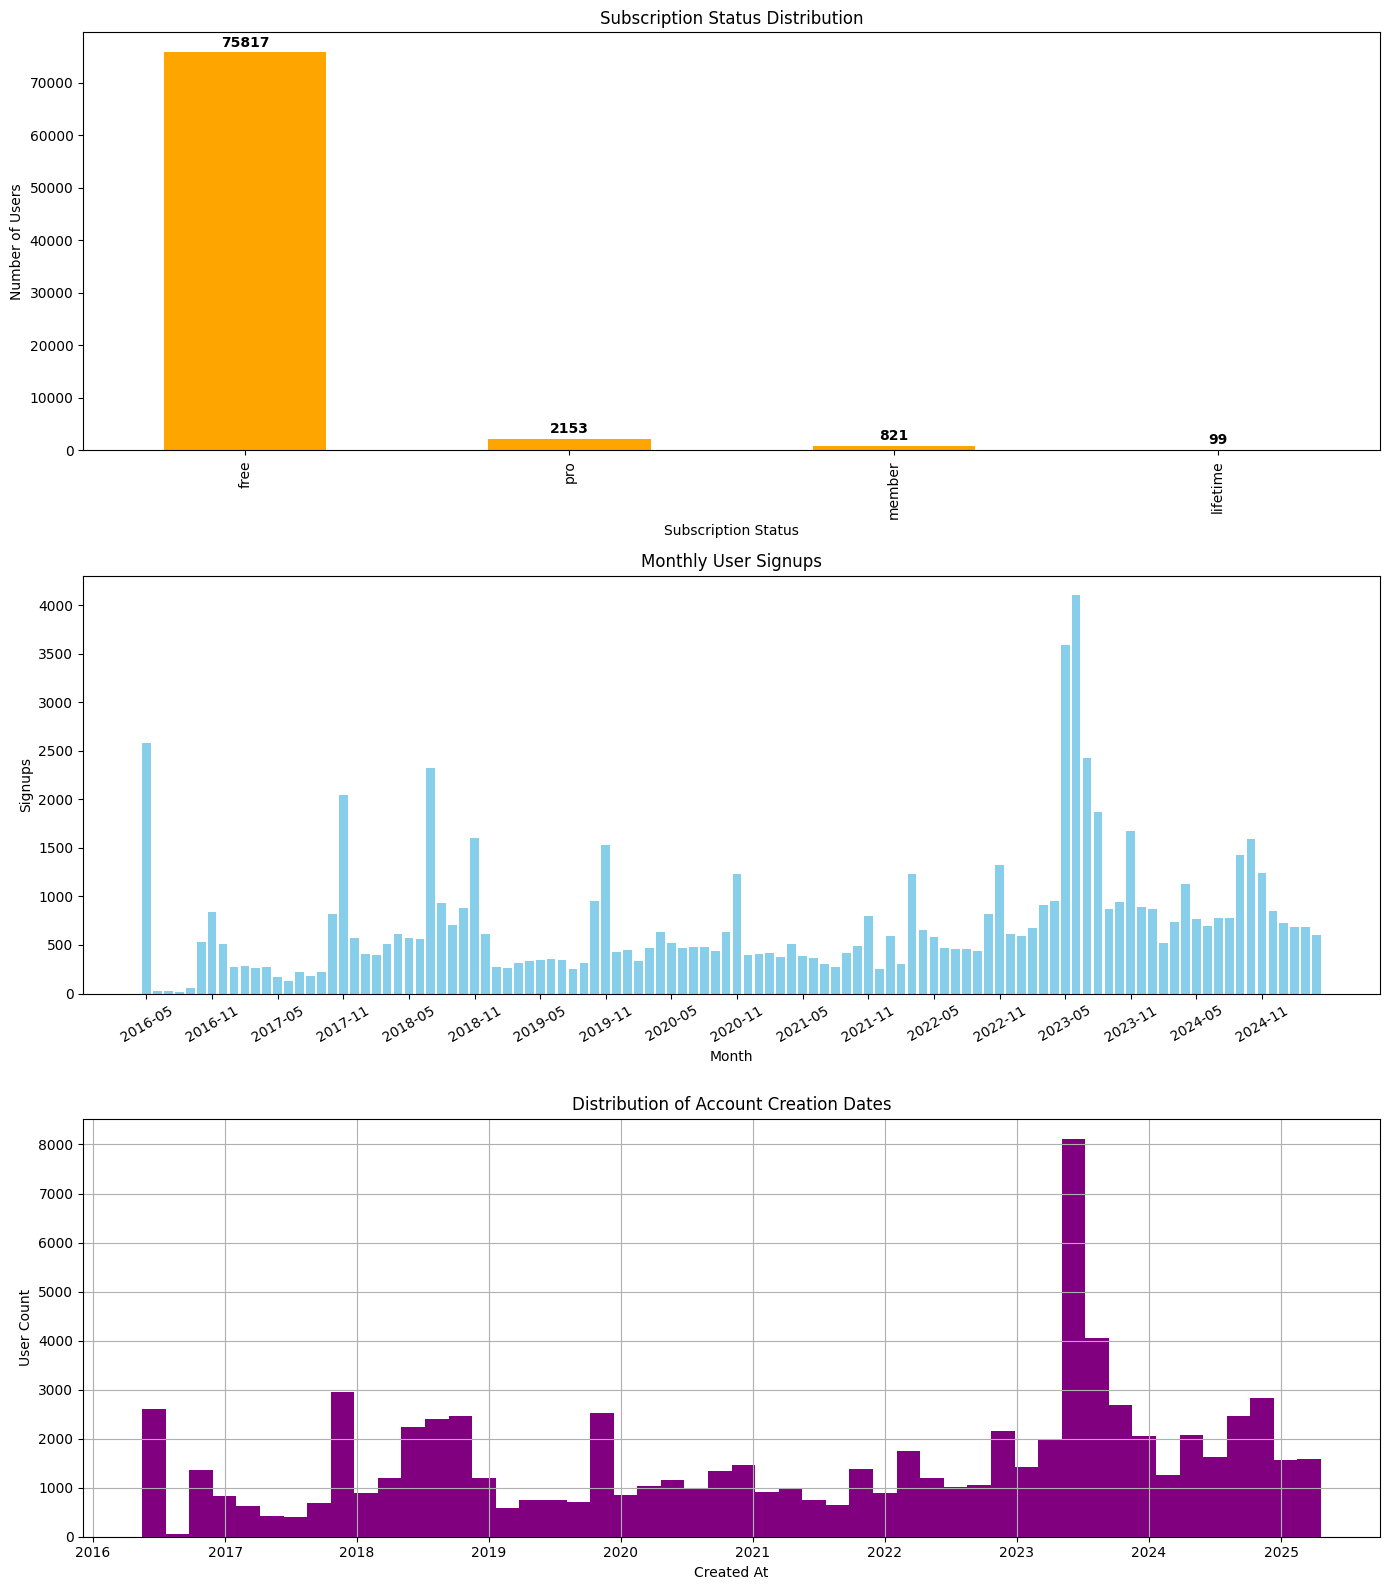

In [4]:
import matplotlib.pyplot as plt


# Create a 'created_month' column for monthly aggregation
app_users_cleaned["created_month"] = app_users_cleaned["created_at"].dt.to_period("M").astype(str)
monthly_counts = app_users_cleaned["created_month"].value_counts().sort_index()

# Setup figure and subplots
fig, axs = plt.subplots(3, 1, figsize=(14, 16))

# 1. Subscription Status Distribution
counts = app_users_cleaned["subscription_status"].value_counts()
counts.plot(kind='bar', color='orange', ax=axs[0])
axs[0].set_title("Subscription Status Distribution")
axs[0].set_xlabel("Subscription Status")
axs[0].set_ylabel("Number of Users")
axs[0].grid(False)

# Add labels on top of bars
for i, value in enumerate(counts):
    axs[0].text(i, value + 500, str(value), ha='center', va='bottom', fontweight='bold')

# 2. Monthly User Signups with better ticks
axs[1].bar(monthly_counts.index, monthly_counts.values, color='skyblue')
axs[1].set_title("Monthly User Signups")
axs[1].set_xlabel("Month")
axs[1].set_ylabel("Signups")

# Custom x-ticks for readability (every 6th month)
xticks = list(range(0, len(monthly_counts), 6))
axs[1].set_xticks([monthly_counts.index[i] for i in xticks])
axs[1].set_xticklabels([monthly_counts.index[i] for i in xticks], rotation=30)

# 3. Distribution of Account Creation Dates
app_users_cleaned["created_at"].hist(bins=50, color='purple', ax=axs[2])
axs[2].set_title("Distribution of Account Creation Dates")
axs[2].set_xlabel("Created At")
axs[2].set_ylabel("User Count")

plt.tight_layout()
plt.show()


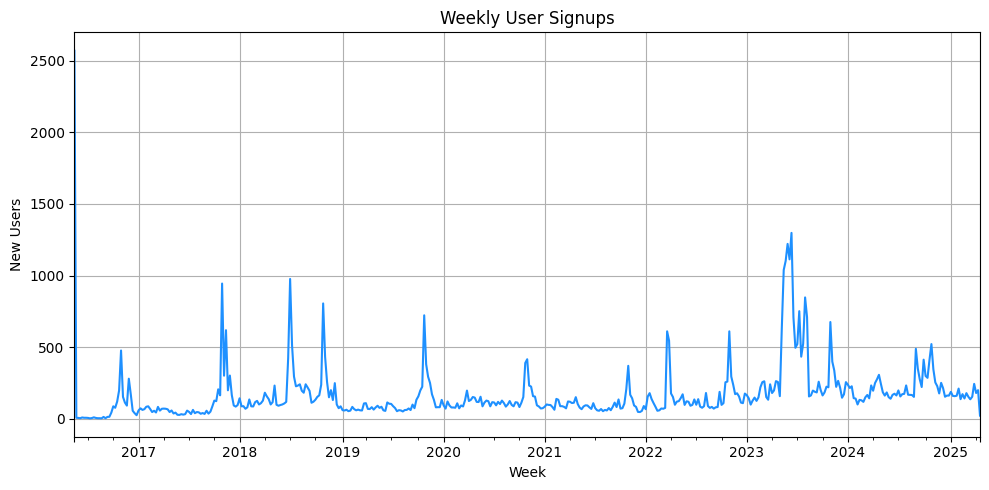

In [5]:
# Ensure 'created_at' is datetime
app_users_cleaned["created_at"] = pd.to_datetime(app_users_cleaned["created_at"], errors='coerce')

# Create a weekly column
app_users_cleaned["signup_week"] = app_users_cleaned["created_at"].dt.to_period("W").dt.start_time

# Count signups per week
weekly_signups = app_users_cleaned.groupby("signup_week").size()

# Plot
plt.figure(figsize=(10, 5))
weekly_signups.plot(kind='line', color='dodgerblue')
plt.title("Weekly User Signups")
plt.xlabel("Week")
plt.ylabel("New Users")
plt.grid(True)
plt.tight_layout()
plt.show()

## 2.2 App_User_Subscription

In [6]:
# Convert object columns to datetime (e.g., created_at, started_at_utc)
for col in user_subscription_cleaned.select_dtypes(include='object'):
    try:
        user_subscription_cleaned[col] = pd.to_datetime(user_subscription_cleaned[col])
    except Exception:
        pass  # Leave non-date columns unchanged

# Basic EDA
print("\n--- EDA: user_subscription_cleaned ---")
print("Shape:", user_subscription_cleaned.shape)

# Missing values
missing = user_subscription_cleaned.isnull().sum()
print("\nMissing Values:\n", missing[missing > 0])

# Data types
print("\nData Types:\n", user_subscription_cleaned.dtypes)

# Summary statistics
print("\nSummary Statistics:\n", user_subscription_cleaned.describe(include='all'))


--- EDA: user_subscription_cleaned ---
Shape: (6818, 14)

Missing Values:
 expires_at_utc           21
next_reward_at_utc      580
next_reminder_at_utc    644
updated_at              735
dtype: int64

Data Types:
 id                               int64
iduser                           int64
tier_name                       object
interval_name                   object
product_price                  float64
status                          object
product_id                       int64
provider                        object
started_at_utc          datetime64[ns]
expires_at_utc                  object
next_reward_at_utc      datetime64[ns]
next_reminder_at_utc            object
created_at              datetime64[ns]
updated_at              datetime64[ns]
dtype: object

Summary Statistics:
                  id        iduser tier_name interval_name  product_price  \
count   6818.000000   6818.000000      6818          6818    6818.000000   
unique          NaN           NaN         3        

/tmp/ipykernel_2126/325926678.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  user_subscription_cleaned[col] = pd.to_datetime(user_subscription_cleaned[col])
/tmp/ipykernel_2126/325926678.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  user_subscription_cleaned[col] = pd.to_datetime(user_subscription_cleaned[col])
/tmp/ipykernel_2126/325926678.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  user_subscription_cleaned[col] = pd.to_datetime(user_subscription_cleaned[col])
/tmp/ipykernel_2126/325926678.py:4: UserWarning: Could not infer format, so each element will 

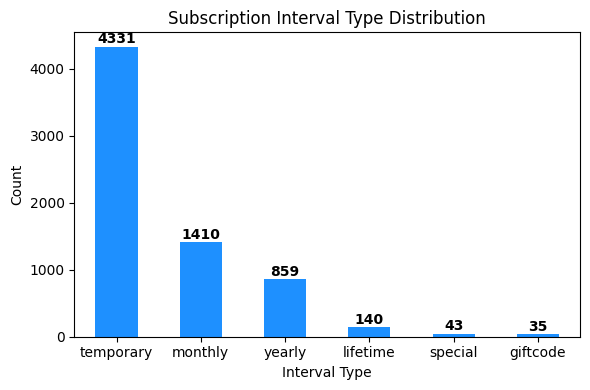

In [7]:
# Get value counts
interval_counts = user_subscription_cleaned["interval_name"].value_counts()

# Plot bar chart
plt.figure(figsize=(6, 4))
bars = interval_counts.plot(kind="bar", color="dodgerblue")
plt.title("Subscription Interval Type Distribution")
plt.xlabel("Interval Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()

# Add data labels on top of each bar
for i, value in enumerate(interval_counts):
    plt.text(i, value + 10, str(value), ha='center', va='bottom', fontweight='bold')

plt.show()

## 2.3 App_User_Subsccription_Status

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# --- EDA ---
print("\n--- EDA: subscription_status ---")
print("Shape:", subscription_status_cleaned.shape)
print("\nMissing Values:\n", subscription_status_cleaned.isnull().sum()[subscription_status_cleaned.isnull().sum() > 0])
print("\nData Types:\n", subscription_status_cleaned.dtypes)
print("\nSummary Statistics:\n", subscription_status_cleaned.describe(include='all'))


--- EDA: subscription_status ---
Shape: (224, 19)

Missing Values:
 Series([], dtype: int64)

Data Types:
 id                        int64
date                     object
trial_total               int64
unconverted_total         int64
subscriber_total          int64
subscriber_member         int64
subscriber_pro            int64
subscriber_lifetime       int64
expired_total             int64
converted_to_member       int64
converted_to_pro          int64
converted_to_lifetime     int64
lost_conversion           int64
resurrected               int64
lost                      int64
expired_from_member       int64
expired_from_pro          int64
updated_at               object
created_at               object
dtype: object

Summary Statistics:
                 id                 date  trial_total  unconverted_total  \
count   224.000000                  224   224.000000         224.000000   
unique         NaN                  224          NaN                NaN   
top            NaN  202

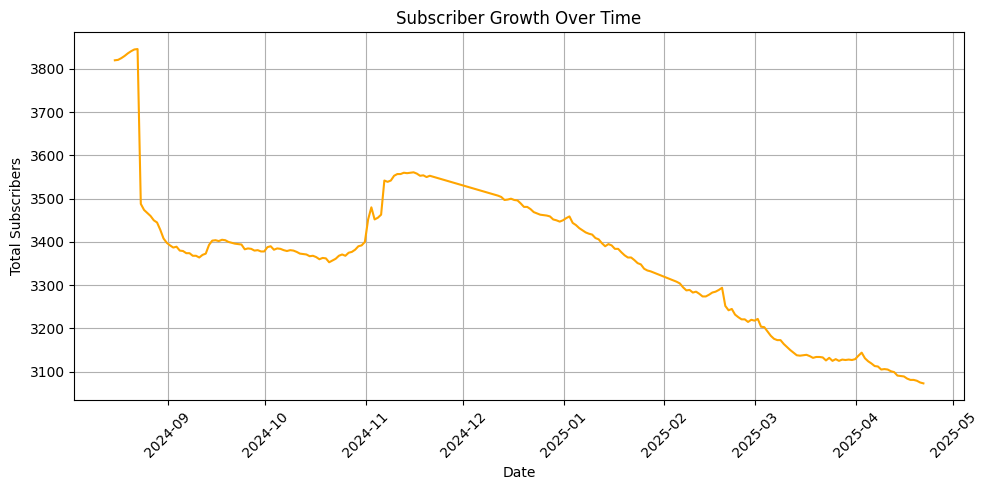

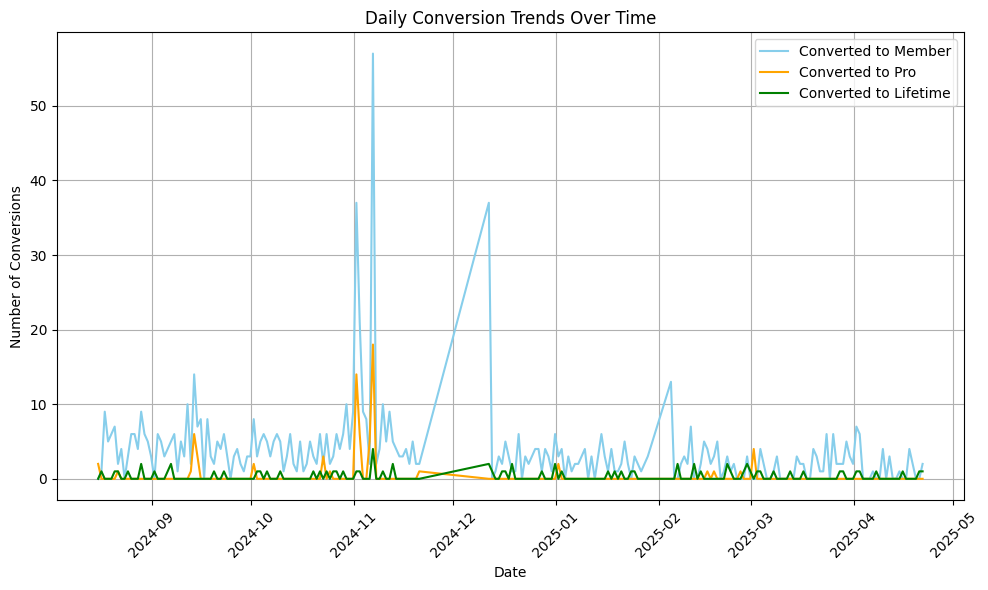

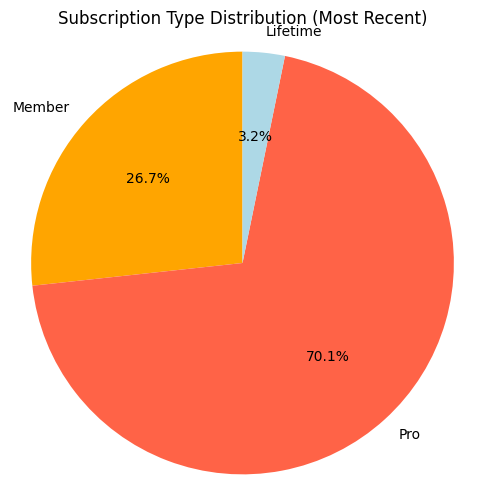

In [9]:
import matplotlib.dates as mdates

# Parse and clean date
subscription_status_cleaned["date"] = pd.to_datetime(subscription_status_cleaned["date"], errors='coerce')
subscription_status_cleaned = subscription_status_cleaned.dropna(subset=["date"])

# 1. Subscriber Growth Over Time
# Plot
plt.figure(figsize=(10, 5))
plt.plot(subscription_status_cleaned["date"], subscription_status_cleaned["subscriber_total"], color='orange')
plt.title("Subscriber Growth Over Time")
plt.xlabel("Date")
plt.ylabel("Total Subscribers")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Plot conversion trends over time
plt.figure(figsize=(10, 6))
plt.plot(subscription_status_cleaned["date"], subscription_status_cleaned["converted_to_member"], label="Converted to Member", color="skyblue")
plt.plot(subscription_status_cleaned["date"], subscription_status_cleaned["converted_to_pro"], label="Converted to Pro", color="orange")
plt.plot(subscription_status_cleaned["date"], subscription_status_cleaned["converted_to_lifetime"], label="Converted to Lifetime", color="green")
plt.title("Daily Conversion Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Conversions")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Subscription Type Distribution (latest date)
latest_row = subscription_status_cleaned.sort_values("date").iloc[-1]
labels = ["Member", "Pro", "Lifetime"]
sizes = [
    latest_row["subscriber_member"],
    latest_row["subscriber_pro"],
    latest_row["subscriber_lifetime"]
]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['orange', 'tomato', 'lightblue'])
plt.title("Subscription Type Distribution (Most Recent)")
plt.axis("equal")
plt.show()

## 2.4 Payment_Products

In [10]:
import pandas as pd

# Load dataset
payment_products = pd.read_csv("payment_products.csv")

# Convert object columns to datetime (optional for better EDA)
for col in payment_products.select_dtypes(include='object'):
    try:
        payment_products[col] = pd.to_datetime(payment_products[col])
    except Exception:
        pass  # Skip columns that can't be converted

# Perform EDA
print("\n--- EDA: payment_products ---")
print("Shape:", payment_products.shape)
print("\nMissing Values:\n", payment_products.isnull().sum()[payment_products.isnull().sum() > 0])
print("\nData Types:\n", payment_products.dtypes)
print("\nSummary Statistics:\n", payment_products.describe(include='all'))


--- EDA: payment_products ---
Shape: (219, 15)

Missing Values:
 coupon    138
dtype: int64

Data Types:
 id                         int64
gameobjecthash            object
name                      object
image                     object
method                    object
category                   int64
discount                   int64
price                    float64
featured                   int64
popular                    int64
coupon                    object
published_at      datetime64[ns]
expires_at        datetime64[ns]
created_at        datetime64[ns]
updated_at        datetime64[ns]
dtype: object

Summary Statistics:
                 id gameobjecthash                        name  \
count   219.000000            219                         219   
unique         NaN            219                         158   
top            NaN          pro_5  Bundle of 44 Core Crystals   
freq           NaN              1                           7   
mean    145.196347            NaN    

/tmp/ipykernel_2126/1097236828.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  payment_products[col] = pd.to_datetime(payment_products[col])
/tmp/ipykernel_2126/1097236828.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  payment_products[col] = pd.to_datetime(payment_products[col])
/tmp/ipykernel_2126/1097236828.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  payment_products[col] = pd.to_datetime(payment_products[col])
/tmp/ipykernel_2126/1097236828.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`

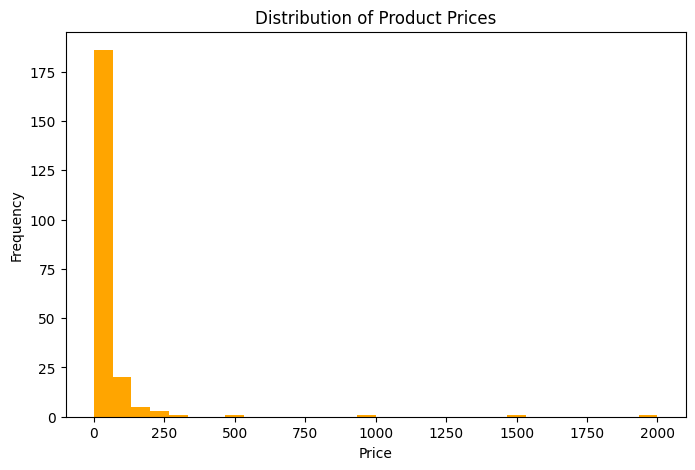

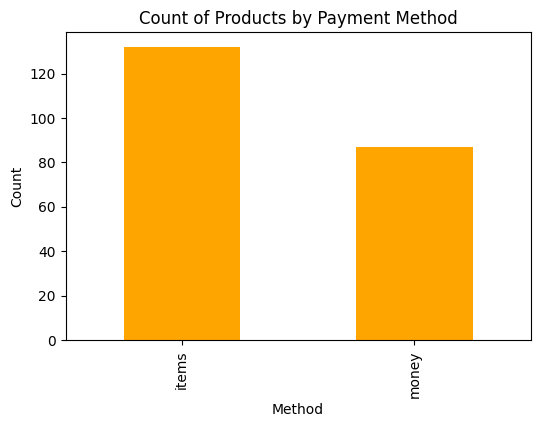

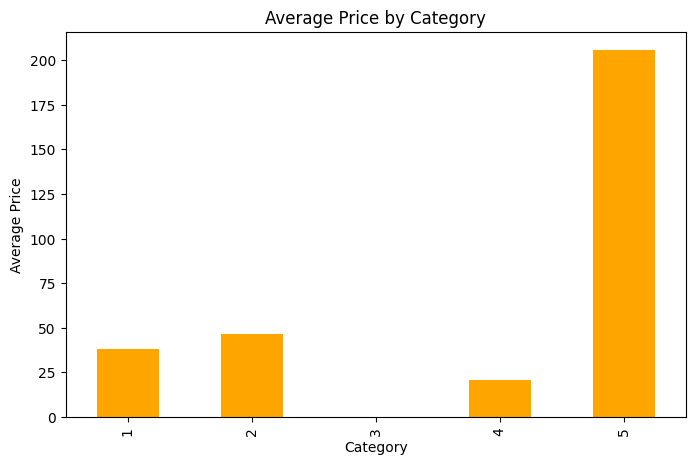

In [11]:
import matplotlib.pyplot as plt

# 1. Distribution of Product Prices
plt.figure(figsize=(8, 5))
payment_products["price"].hist(bins=30, color='orange')
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

# 2. Count of Products by Payment Method
plt.figure(figsize=(6, 4))
payment_products["method"].value_counts().plot(kind='bar', color='orange')
plt.title("Count of Products by Payment Method")
plt.xlabel("Method")
plt.ylabel("Count")
plt.grid(False)
plt.show()

# 3. Average Price by Category
plt.figure(figsize=(8, 5))
payment_products.groupby("category")["price"].mean().plot(kind='bar', color='orange')
plt.title("Average Price by Category")
plt.xlabel("Category")
plt.ylabel("Average Price")
plt.grid(False)
plt.show()

### 

1. Distribution of Product Prices:

Most products are priced very low.

A few products are priced above 500 and up to 2000, creating a right-skewed distribution.

2. Count of Products by Payment Method:

items method is used more frequently than money.

3. Average Price by Category:

Category 5 has the highest average product price.

Categories 1 and 4 have notably lower average prices.

## 2.5 Payment_History

In [12]:
# Convert object columns to datetime where possible
for col in payment_history_cleaned.select_dtypes(include='object'):
    try:
        payment_history_cleaned[col] = pd.to_datetime(payment_history_cleaned[col])
    except Exception:
        pass  # Skip columns that aren't datetime

# --- EDA ---

print("\n--- EDA: payment_history_cleaned ---")

# 1. Shape
print("Shape:", payment_history_cleaned.shape)

# 2. Missing Values
missing = payment_history_cleaned.isnull().sum()
print("\nMissing Values:\n", missing[missing > 0])

# 3. Data Types
print("\nData Types:\n", payment_history_cleaned.dtypes)

# 4. Summary Statistics (includes both numeric and object data)
print("\nSummary Statistics:\n", payment_history_cleaned.describe(include='all'))

/tmp/ipykernel_2126/1946462517.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  payment_history_cleaned[col] = pd.to_datetime(payment_history_cleaned[col])
/tmp/ipykernel_2126/1946462517.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  payment_history_cleaned[col] = pd.to_datetime(payment_history_cleaned[col])
/tmp/ipykernel_2126/1946462517.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  payment_history_cleaned[col] = pd.to_datetime(payment_history_cleaned[col])
/tmp/ipykernel_2126/1946462517.py:4: UserWarning: Could not infer format, so each element will be parse


--- EDA: payment_history_cleaned ---
Shape: (120057, 16)

Missing Values:
 producthash       4674
category          4382
rewards           5247
iduser             138
buying_option     2472
description      27838
redeemed          2551
updated_at         210
dtype: int64

Data Types:
 idpayment                 int64
producthash              object
type                     object
status                   object
category                float64
method                   object
amount                  float64
rewards                  object
iduser                  float64
hide_acquire              int64
buying_option            object
description              object
confirmed                 int64
redeemed                float64
created_at       datetime64[ns]
updated_at       datetime64[ns]
dtype: object

Summary Statistics:
             idpayment producthash     type     status       category  method  \
count   120057.000000      115383   120057     120057  115675.000000  120057   
uniqu

/tmp/ipykernel_2126/2418012459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payment_history_cleaned["created_at"] = pd.to_datetime(payment_history_cleaned["created_at"], errors='coerce')
/tmp/ipykernel_2126/2418012459.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payment_history_cleaned["created_month"] = payment_history_cleaned["created_at"].dt.to_period("M").astype(str)


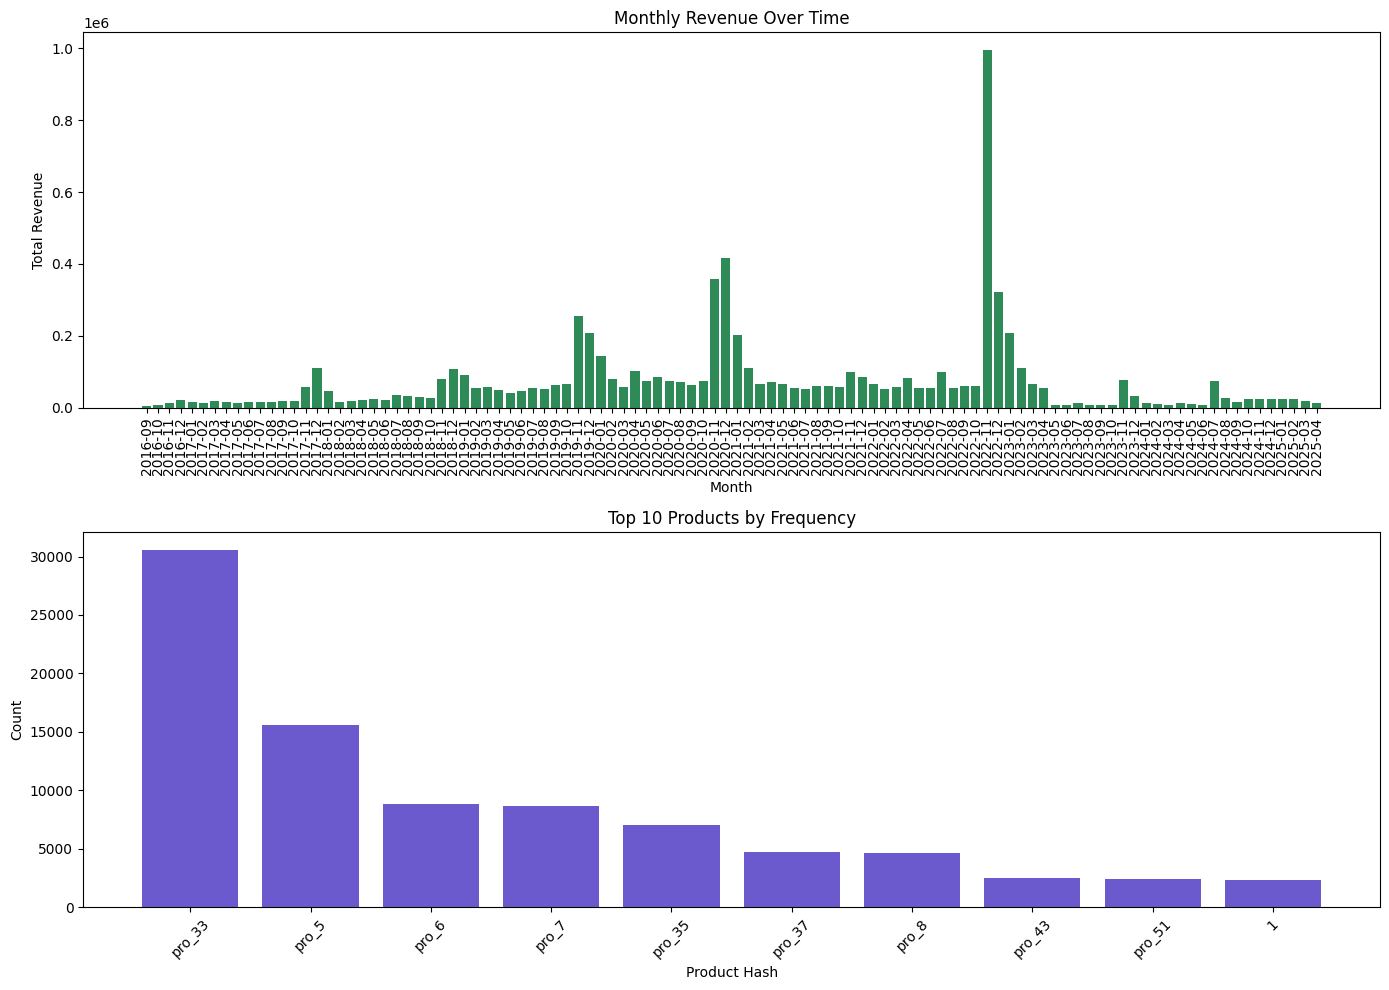

In [13]:
# Ensure datetime parsing
payment_history_cleaned["created_at"] = pd.to_datetime(payment_history_cleaned["created_at"], errors='coerce')

# 1. Monthly Revenue Over Time
payment_history_cleaned["created_month"] = payment_history_cleaned["created_at"].dt.to_period("M").astype(str)
monthly_revenue = payment_history_cleaned.groupby("created_month")["amount"].sum()

# 2. Top 10 Products by Frequency
top_products = payment_history_cleaned["producthash"].value_counts().head(10)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 10))

# Plot monthly revenue
axs[0].bar(monthly_revenue.index, monthly_revenue.values, color="seagreen")
axs[0].set_title("Monthly Revenue Over Time")
axs[0].set_xlabel("Month")
axs[0].set_ylabel("Total Revenue")
axs[0].tick_params(axis='x', rotation=90)

# Plot top 10 products
axs[1].bar(top_products.index, top_products.values, color="slateblue")
axs[1].set_title("Top 10 Products by Frequency")
axs[1].set_xlabel("Product Hash")
axs[1].set_ylabel("Count")
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 3. Combining Data into One DataFrame for ML

In [14]:
# Prepare each dataset

# Drop 'id' column from app_users and rename 'idhero' → 'iduser'
app_users_cleaned = app_users_cleaned.drop(columns=["id"])
app_users_cleaned = app_users_cleaned.rename(columns={"idhero": "iduser"})

# Drop 'id' column from subscriptions
user_subscription_cleaned = user_subscription_cleaned.drop(columns=["id"])

# Drop 'idpayment' column from payment history
payment_history_cleaned = payment_history_cleaned.drop(columns=["idpayment"])

# Merge step-by-step on 'iduser'
merged_df = app_users_cleaned.merge(user_subscription_cleaned, on="iduser", how="left")
merged_df = merged_df.merge(payment_history_cleaned, on="iduser", how="left")

# Show the first few rows
print(merged_df.head())

   iduser username        created_at_x subscription_status created_month_x  \
0       1   CasuMa 2017-12-07 22:55:35                 pro         2017-12   
1       1   CasuMa 2017-12-07 22:55:35                 pro         2017-12   
2       1   CasuMa 2017-12-07 22:55:35                 pro         2017-12   
3       1   CasuMa 2017-12-07 22:55:35                 pro         2017-12   
4       1   CasuMa 2017-12-07 22:55:35                 pro         2017-12   

  signup_week tier_name interval_name  product_price status_x  ...  amount  \
0  2017-12-04       pro     temporary            0.0   active  ...    88.0   
1  2017-12-04       pro     temporary            0.0   active  ...     3.0   
2  2017-12-04       pro     temporary            0.0   active  ...    30.0   
3  2017-12-04       pro     temporary            0.0   active  ...    44.0   
4  2017-12-04       pro     temporary            0.0   active  ...     4.0   

                                             rewards hide_acqu

In [15]:
import pandas as pd

# Load dataset
merged_df = pd.read_csv("merged_user_data.csv", low_memory=False)

# 1. Drop columns with more than 90% missing values
threshold = 0.9
merged_df = merged_df.dropna(thresh=int((1 - threshold) * len(merged_df)), axis=1)

# 2. Drop redundant and uninformative columns
redundant_cols = [
    "created_at_y", "updated_at_x", "updated_at_y",
    "promotional_code", "coupon", "info", "redeem_code",
    "referred_by", "redeemed", "confirmed",
    "from_name", "to_id", "invoce_at"
]
merged_df = merged_df.drop(columns=redundant_cols, errors='ignore')

# 3. Rename ambiguous columns
merged_df = merged_df.rename(columns={
    "created_at_x": "user_created_at",
    "status_x": "subscription_status",
    "status_y": "payment_status"
})

# 4. Ensure date columns are parsed correctly
date_cols = ["user_created_at", "started_at_utc", "expires_at_utc", "created_at"]
for col in date_cols:
    if col in merged_df.columns:
        merged_df[col] = pd.to_datetime(merged_df[col], errors='coerce')

# 5. Convert key numeric columns to numeric types
merged_df["amount"] = pd.to_numeric(merged_df.get("amount", 0), errors='coerce')
merged_df["product_price"] = pd.to_numeric(merged_df.get("product_price", 0), errors='coerce')

# 6. Drop rows missing essential user ID
merged_df = merged_df.dropna(subset=["iduser"])

# 7. Save cleaned dataset
merged_df.to_csv("cleaned_merged_user_data.csv", index=False)

# Preview
print("Cleaned dataset shape:", merged_df.shape)
print(merged_df.head())


/tmp/ipykernel_2126/536796485.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df[col] = pd.to_datetime(merged_df[col], errors='coerce')


Cleaned dataset shape: (213627, 28)
   iduser username     user_created_at subscription_status created_month_x  \
0       1   CasuMa 2017-12-07 22:55:35                 pro         2017-12   
1       1   CasuMa 2017-12-07 22:55:35                 pro         2017-12   
2       1   CasuMa 2017-12-07 22:55:35                 pro         2017-12   
3       1   CasuMa 2017-12-07 22:55:35                 pro         2017-12   
4       1   CasuMa 2017-12-07 22:55:35                 pro         2017-12   

  signup_week tier_name interval_name  product_price subscription_status  ...  \
0  2017-12-04       pro     temporary            0.0              active  ...   
1  2017-12-04       pro     temporary            0.0              active  ...   
2  2017-12-04       pro     temporary            0.0              active  ...   
3  2017-12-04       pro     temporary            0.0              active  ...   
4  2017-12-04       pro     temporary            0.0              active  ...   

   payme

# 3. Diagnostic & Baseline Analysis

# 3.1 Revenue Stream Analysis

In [16]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("cleaned_merged_user_data.csv", low_memory=False)

# Parse dates
df["user_created_at"] = pd.to_datetime(df["user_created_at"], errors='coerce')
df["created_at"] = pd.to_datetime(df["created_at"], errors='coerce')

# Convert amount to numeric
df["amount"] = pd.to_numeric(df["amount"], errors='coerce')

# 1. Monthly Revenue Trend
df["month"] = df["created_at"].dt.to_period("M")
monthly_revenue = df.groupby("month")["amount"].sum().sort_index()

# 2. Revenue by Subscription Tier
revenue_by_tier = df.groupby("tier_name")["amount"].sum().sort_values(ascending=False)

# 3. Revenue by Payment Method
revenue_by_method = df.groupby("method")["amount"].sum().sort_values(ascending=False)

# 4. Revenue by Subscription Lifecycle Status
revenue_by_status = df.groupby("subscription_status.1")["amount"].sum().sort_values(ascending=False)

# Display each part
print("\nMonthly Revenue:\n", monthly_revenue)
print("\nRevenue by Tier:\n", revenue_by_tier)
print("\nRevenue by Payment Method:\n", revenue_by_method)
print("\nRevenue by Subscription Status:\n", revenue_by_status)



Monthly Revenue:
 month
2016-09     4648.0
2016-10     7315.0
2016-11    13113.0
2016-12    20836.0
2017-01    14702.0
            ...   
2024-12    44175.7
2025-01    39995.0
2025-02    45042.0
2025-03    38873.0
2025-04    23387.0
Freq: M, Name: amount, Length: 104, dtype: float64

Revenue by Tier:
 tier_name
pro         4738346.7
member       779325.6
lifetime     509112.5
Name: amount, dtype: float64

Revenue by Payment Method:
 method
items     6914600.0
paypal    1504345.7
card       220148.6
Name: amount, dtype: float64

Revenue by Subscription Status:
 subscription_status.1
active              3612732.5
expired             1468797.2
approval_pending     556081.8
upgraded             285370.1
invalid               75354.8
canceled              26204.4
holding                1496.0
paused                  748.0
Name: amount, dtype: float64


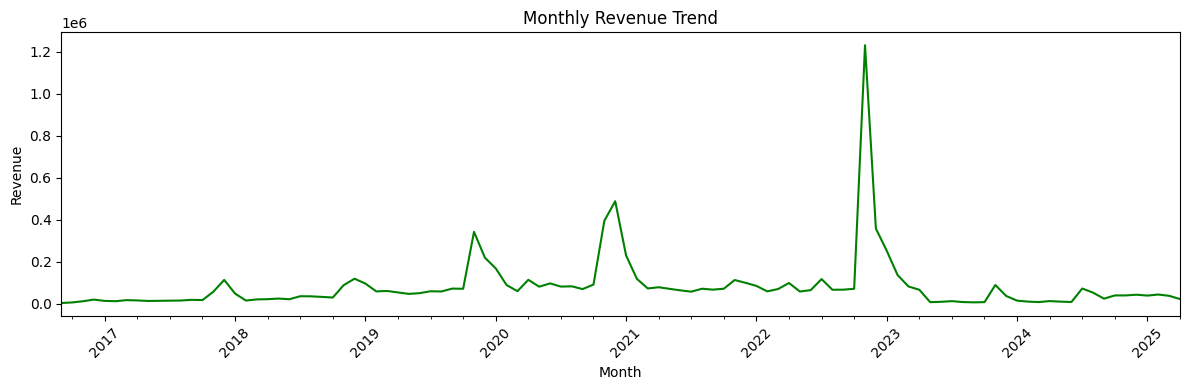

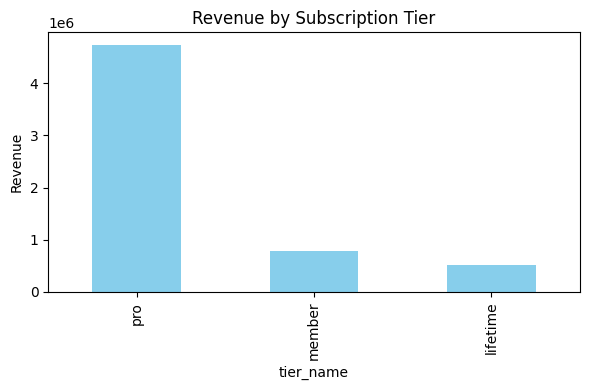

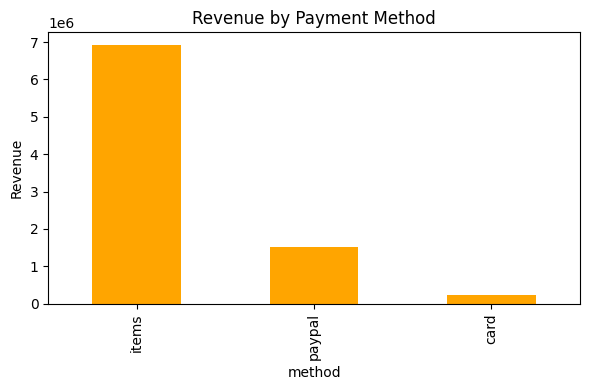

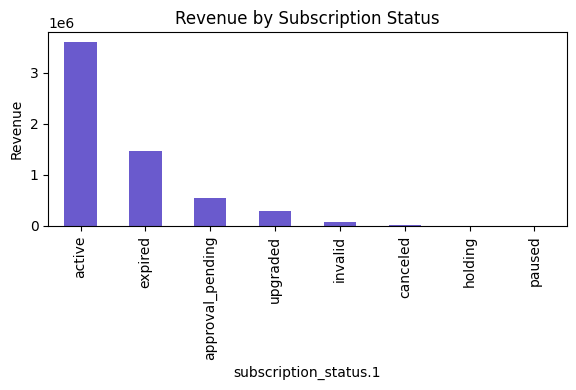

In [17]:
# Convert relevant columns
df["user_created_at"] = pd.to_datetime(df["user_created_at"], errors='coerce')
df["created_at"] = pd.to_datetime(df["created_at"], errors='coerce')
df["amount"] = pd.to_numeric(df["amount"], errors='coerce')

# Monthly revenue
df["month"] = df["created_at"].dt.to_period("M")
monthly_revenue = df.groupby("month")["amount"].sum().sort_index()

# Revenue by tier
revenue_by_tier = df.groupby("tier_name")["amount"].sum().sort_values(ascending=False)

# Revenue by payment method
revenue_by_method = df.groupby("method")["amount"].sum().sort_values(ascending=False)

# Revenue by subscription lifecycle status
revenue_by_status = df.groupby("subscription_status.1")["amount"].sum().sort_values(ascending=False)

# === Visualization ===

# 1. Monthly Revenue Trend
plt.figure(figsize=(12, 4))
monthly_revenue.plot(title="Monthly Revenue Trend", color="green")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Revenue by Subscription Tier
plt.figure(figsize=(6, 4))
revenue_by_tier.plot(kind="bar", title="Revenue by Subscription Tier", color="skyblue")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

# 3. Revenue by Payment Method
plt.figure(figsize=(6, 4))
revenue_by_method.plot(kind="bar", title="Revenue by Payment Method", color="orange")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

# 4. Revenue by Subscription Status
plt.figure(figsize=(6, 4))
revenue_by_status.plot(kind="bar", title="Revenue by Subscription Status", color="slateblue")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

# 3.2 User Segements (To Be Fixed)

In [18]:
import pandas as pd

# Load the cleaned merged dataset
df = pd.read_csv("cleaned_merged_user_data.csv", low_memory=False)

# Convert datetime columns
df["user_created_at"] = pd.to_datetime(df["user_created_at"], errors='coerce')
df["started_at_utc"] = pd.to_datetime(df["started_at_utc"], errors='coerce')
df["expires_at_utc"] = pd.to_datetime(df["expires_at_utc"], errors='coerce')

# Convert amount to numeric
df["amount"] = pd.to_numeric(df["amount"], errors='coerce')

# Feature engineering
df["account_age_days"] = (pd.Timestamp.today() - df["user_created_at"]).dt.days
df["subscription_duration"] = (df["expires_at_utc"] - df["started_at_utc"]).dt.days
df["is_churned"] = df["subscription_status.1"].isin(["expired", "canceled", "invalid"])

# Aggregate at the user level
user_segments = df.groupby("iduser").agg({
    "amount": "sum",
    "product_price": "mean",
    "subscription_duration": "mean",
    "account_age_days": "mean",
    "subscription_status.1": "last",
    "tier_name": "last"
}).rename(columns={
    "amount": "total_spent",
    "product_price": "avg_price",
    "subscription_duration": "avg_duration",
    "account_age_days": "account_age_days",
    "subscription_status.1": "lifecycle_status",
    "tier_name": "tier"
}).reset_index()

# Define user segments
user_segments["segment"] = "Others"
user_segments.loc[user_segments["total_spent"] > 500, "segment"] = "High-Value"
user_segments.loc[(user_segments["avg_duration"] < 30) & (user_segments["tier"] == "pro"), "segment"] = "Underutilizing"
user_segments.loc[user_segments["lifecycle_status"].isin(["expired", "canceled"]), "segment"] = "Churned"
user_segments.loc[(user_segments["account_age_days"] > 365) & (~user_segments["lifecycle_status"].isin(["expired", "canceled"])), "segment"] = "Loyal"

# Output segmented user data
print(user_segments[["iduser", "total_spent", "tier", "lifecycle_status", "segment"]].head())


   iduser  total_spent      tier lifecycle_status segment
0       1     153893.0    member           active   Loyal
1      28     223752.0  lifetime           active   Loyal
2      92          0.0      None             None   Loyal
3     106        108.0      None             None   Loyal
4     132          0.0      None             None   Loyal


# 3.3 Churn Rate Analysis

In [19]:
import pandas as pd

# Load cleaned dataset
cleaned_df = pd.read_csv("cleaned_merged_user_data.csv", low_memory=False)

# Convert date columns
date_columns = ["user_created_at", "started_at_utc", "expires_at_utc"]
for col in date_columns:
    cleaned_df[col] = pd.to_datetime(cleaned_df[col], errors='coerce')

# Feature engineering
cleaned_df["account_age_days"] = (pd.Timestamp.today() - cleaned_df["user_created_at"]).dt.days
cleaned_df["subscription_duration"] = (cleaned_df["expires_at_utc"] - cleaned_df["started_at_utc"]).dt.days

# Define churn using lifecycle subscription status
churn_statuses = ["expired", "canceled", "invalid"]
cleaned_df["is_churned"] = cleaned_df["subscription_status.1"].isin(churn_statuses)

# 1. Churn Rate by Tier
churn_by_tier = cleaned_df.groupby("tier_name")["is_churned"].mean()
churn_by_tier.name = "Churn Rate by Tier"

# 2. Churn Rate by Price Bucket
cleaned_df["price_bucket"] = pd.qcut(cleaned_df["product_price"].fillna(0), q=5, duplicates="drop")
churn_by_price = cleaned_df.groupby("price_bucket")["is_churned"].mean()
churn_by_price.name = "Churn Rate by Price"

# 3. Churn Rate by Account Age Group
age_bins = [0, 180, 365, 730, 10000]
age_labels = ["<6m", "6-12m", "1-2y", "2+y"]
cleaned_df["account_age_group"] = pd.cut(cleaned_df["account_age_days"], bins=age_bins, labels=age_labels)
churn_by_age = cleaned_df.groupby("account_age_group")["is_churned"].mean()
churn_by_age.name = "Churn Rate by Account Age"

# Combine and display all churn segments
churn_segments = pd.concat([churn_by_tier, churn_by_price, churn_by_age], axis=1, sort=False)
print(churn_segments)


                 Churn Rate by Tier  Churn Rate by Price  \
lifetime                   0.000000                  NaN   
member                     0.204342                  NaN   
pro                        0.403035                  NaN   
(-0.001, 599.0]                 NaN             0.158861   
<6m                             NaN                  NaN   
6-12m                           NaN                  NaN   
1-2y                            NaN                  NaN   
2+y                             NaN                  NaN   

                 Churn Rate by Account Age  
lifetime                               NaN  
member                                 NaN  
pro                                    NaN  
(-0.001, 599.0]                        NaN  
<6m                               0.032473  
6-12m                             0.168627  
1-2y                              0.139597  
2+y                               0.163934  


/tmp/ipykernel_2126/609966676.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_price = cleaned_df.groupby("price_bucket")["is_churned"].mean()
/tmp/ipykernel_2126/609966676.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_age = cleaned_df.groupby("account_age_group")["is_churned"].mean()
